In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cur_country = 'russia'
countries = ['china', 'japan', 'india', 'russia']
words_remove = {'japan':['Japan', 'Japanese'], 'india':['India', 'Indian'], 'china':['China', 'Chinese'], 'russia':['Russia', 'Russian']}

In [3]:
train = pd.read_csv("./data/" + cur_country + "-mentions2018.csv")

In [4]:
train.head()

,id,url,snippet,source,headline,date,desk,section,type,word_count,locations,subjects
0,5c050cbb3a125f5075bfd322,https://www.nytimes.com/2018/12/03/opinion/rus...,The government insists on reliving the Soviet ...,The New York Times,Russia’s Revisionist History,2018-12-03,SpecialSections,Opinion,News,932,"['Russia', 'Poland']",['Politics and Government']
1,5c1825bb3a125f5075bff970,https://www.nytimes.com/2018/12/17/opinion/rus...,The Senate gave my research team data from soc...,The New York Times,What We Now Know About Russian Disinformation,2018-12-17,OpEd,Opinion,Op-Ed,797,['Russia'],['Russian Interference in 2016 US Elections an...
2,5c01ecaf3a125f5075bfcf3e,https://www.nytimes.com/2018/11/30/opinion/tru...,There’s a connection between Cohen’s guilty pl...,The New York Times,Scent of the Russians,2018-12-01,OpEd,Opinion,Op-Ed,869,"['Russia', 'Ukraine']","['United States International Relations', 'Uni..."
3,5bf645ec3a125f5075bfb82d,https://www.nytimes.com/2018/11/22/opinion/rus...,To understand what makes Putin and his allies ...,The New York Times,What Drives the Russian State,2018-11-22,OpEd,Opinion,Op-Ed,849,['Russia'],"['Embargoes and Sanctions', 'Politics and Gove..."
4,5c1d2d5e3a125f5075c01756,https://www.nytimes.com/2018/12/21/us/politics...,Russian efforts meant to polarize American vot...,The New York Times,"Russians Tried, but Were Unable to Compromise ...",2018-12-21,Washington,U.S.,News,859,['Russia'],"['Midterm Elections (2018)', 'Russian Interfer..."


In [5]:
headlines = train['headline'].values
all_words = train['headline'].str.split(expand=True).unstack().value_counts()
data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

(-0.5, 799.5, 599.5, -0.5)

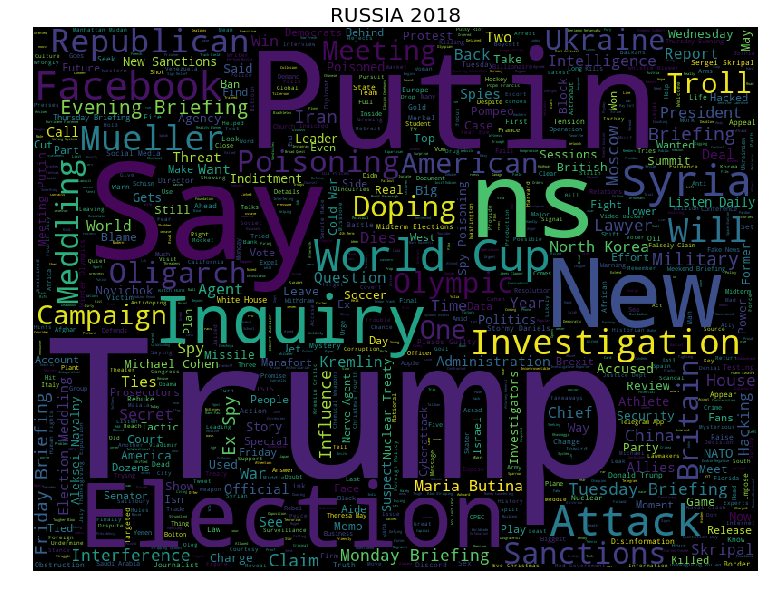

In [6]:
# The wordcloud of 2018 simply remove stopwords
target = " ".join(str(headline) for headline in headlines).replace(words_remove[cur_country][0], '').replace(words_remove[cur_country][1], '')
wc = WordCloud(max_words=10000, stopwords=STOPWORDS, width=800, height=600)
wc.generate(target)
plt.figure(figsize=(20,10))
plt.title(cur_country.upper() + " 2018", fontsize=20)
plt.imshow(wc)
plt.axis('off')

In [7]:
import nltk

In [8]:
stopwords = nltk.corpus.stopwords.words('english')

In [9]:
# headlines_tokenized = [nltk.word_tokenize(headline) for headline in headlines]
# headlines_stop_removed = [[word for word in headline] for headline in headlines]

In [10]:
target_tokenized_list = nltk.word_tokenize(target)

In [11]:
taget_stop_removed = [word for word in target_tokenized_list if word.lower() not in stopwords]

In [12]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

In [13]:
taget_lemmatized = [lemm.lemmatize(word) for word in taget_stop_removed]

(-0.5, 799.5, 599.5, -0.5)

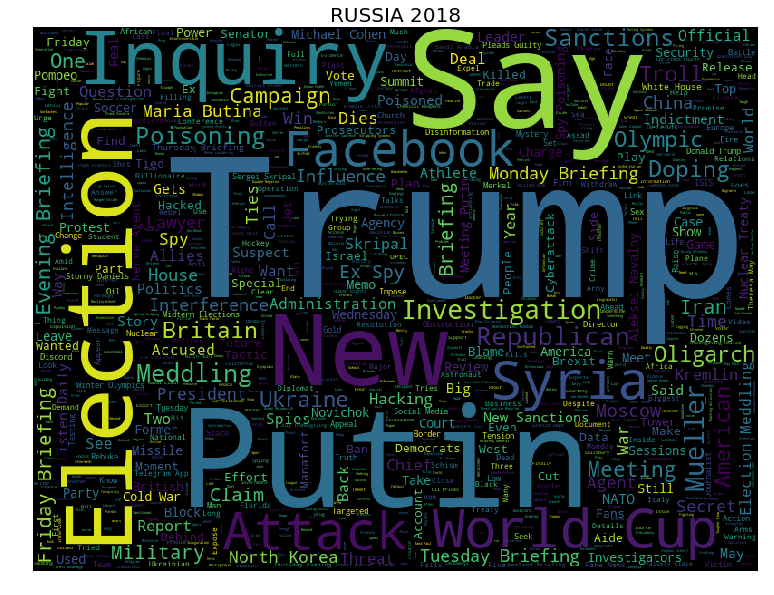

In [14]:
target_updated = " ".join(taget_lemmatized)
wc = WordCloud(max_words=10000, stopwords=STOPWORDS, width=800, height=600)
wc.generate(target_updated)
plt.figure(figsize=(20,10))
plt.title(cur_country.upper() + " 2018", fontsize=20)
plt.imshow(wc)
plt.axis('off')

In [15]:
from textblob import TextBlob

In [16]:
sentiment_country = {}

In [26]:
for country in countries:
    headlines = pd.read_csv("./data/" + country + "-mentions2018.csv")['headline'].values
    total = len(headlines)
    positive = negative = neutral = 0
    for headline in headlines:
        headline = str(headline)
        analysis = TextBlob(headline)
        if analysis.sentiment[0] == 0:
            neutral += 1
        elif analysis.sentiment[0] > 0:
            positive += 1
        else:
            negative += 1
#     print(positive, negative, neutral)
    sentiment_country[country] = [positive, negative, neutral]

In [27]:
# bar chart for a country
# labels = ['positive', 'negative', 'neutral']
# values = [positive, negative, neutral]
# fig = {
#     'data': [{'labels': labels,
#               'values': values,
#               'type': 'pie'}],
#     'layout': {'title': 'Sentiment Analysis about ' + cur_country.upper() + '2018'}
#      }

# py.iplot(fig)

In [28]:
sentiment_country

{'china': [238, 170, 592],
 'japan': [260, 135, 605],
 'india': [214, 146, 640],
 'russia': [181, 173, 646]}